## Wave analysis toolbox

This toolbox contains functions related to the processing of wave signals.


In [75]:
# import default modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# method to import xbtools with try routine
try:
    import deltares_wave_toolbox
except ImportError:
    print('**no deltares_wave_toolbox installation found in environment. Path to tools manually added')
    sys.path.append(os.path.abspath(os.path.join( '..')))

Import the toolbox.

In [76]:
from deltares_wave_toolbox.cores.core_wavefunctions import create_spectrum_jonswap,compute_BattjesGroenendijk_wave_height_distribution
from deltares_wave_toolbox.cores.core_spectral import compute_spectrum_freq_serie
from deltares_wave_toolbox.spectrum import Spectrum

### Spectrum class

The wave toolbox contains a spectrum class. This spectrum class can be created based on a frequency array and energy density array.

In this example, a block-shaped spectrum is constructed. 

In [77]:
f = np.linspace(0,1,100)
S = np.zeros_like(f)

S[10:20] = 1

spec_block = Spectrum(f, S)




This spectral class contains multiple attributes, for example the wave parameters:


In [78]:
Hm0 = spec_block.get_Hm0()
Tps = spec_block.get_Tps()
Tmm10 = spec_block.get_Tmm10()

print('Wave height:{0:.2f} m'.format(Hm0))
print('Peak period:{0:.2f} s'.format(Tps))
print('Spectral period:{0:.2f} s'.format(Tmm10))

Wave height:1.27 m
Peak period:9.00 s
Spectral period:7.20 s


But it is also possible to plot the spectrum:

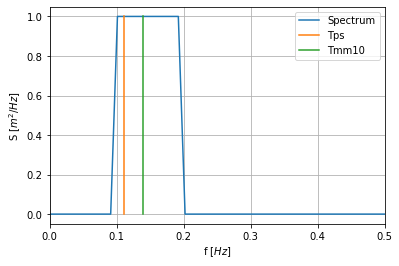

In [79]:
spec_block.plot(xlim=[0, 0.5])


### Construct JONSWAP spectrum

Besides `Jonswap` function, it is also possible to create a JONSWAP spectrum with the `create_spectrum_jonswap` function. The input of this functions is the frequency axis, peak frequency and the wave height.

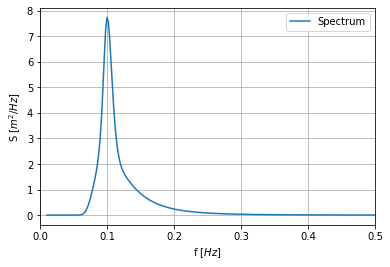

In [80]:

ff = np.linspace(0.01, 2, 1000)

spec = create_spectrum_jonswap(f=ff, fp=0.1, hm0=2)

spec.plot(xlim=[0, 0.5])

Based on the Spectrum class a time series can be generated. The Spectrum class contains a function `create_series` to create a timeseries class:

In [81]:
timeseries = spec.create_series(10, 3600, 0.1)

test


### Time series class

Similar to the Spectrum class the time series class also contains a plot function. When the optionaly parameter plot_crossing is set to True, all the crossings with zero are shown as well.

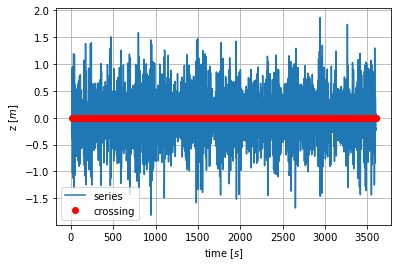

In [82]:
timeseries.plot(plot_crossing=True)

The class also contains some default signal parameters, like mean, variance, maximum and minimum:


In [83]:
print('variance:', timeseries.var())
print('max:', timeseries.max())
print('min:', timeseries.min())
print('mean:', timeseries.mean())

variance: 0.25000531039468904
max: 1.8689350279576764
min: -1.8144801995627622
mean: 5.5263042696123075e-06


The time series class contains also functions related to individual waves. These parameters are based on the individual waves determined with a zero-crossing analysis.

For example, the $H_{rms}$ is available. By theory the $H_{rms}$ times the square-root of 2 is equal to the significant wave height.

In [84]:

Hrms = timeseries.get_Hrms()


print('Hm0: {0:.2f}'.format(spec.get_Hm0()))
print('Hrms x sqrt(2): {0:.2f}'.format(Hrms*np.sqrt(2)))

Hm0: 2.00
Hrms x sqrt(2): 1.96


But also information about the exceedance distribution is available, for example the exceedance wave height or the mean of the highest part of the exceedance distribution.

This means that we have the third definition of the (significant) wave height.

In [85]:
h2perc = timeseries.get_exceedance_waveheight(2)
h10perc = timeseries.get_exceedance_waveheight(10)
Hs, Ts = timeseries.highest_waves(0.33333)

print('Hm0: {0:.2f}'.format(spec.get_Hm0()))
print('Hrms x sqrt(2): {0:.2f}'.format(Hrms*np.sqrt(2)))
print('Hs: {0:.2f}'.format(Hs))

Hm0: 2.00
Hrms x sqrt(2): 1.96
Hs: 1.95


The time series class also contains a `get_spectrum` function to create a spectrum based on the time series.

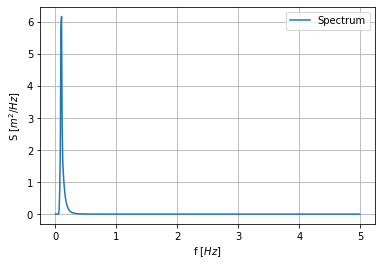

In [86]:
spec2 = timeseries.get_spectrum(fres=0.01)
spec2.plot()

### Exceedance distributions
The exceedance distribution of the time series can be visualized with the following code,



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


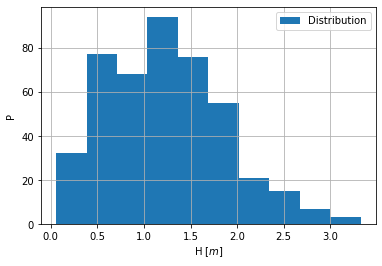

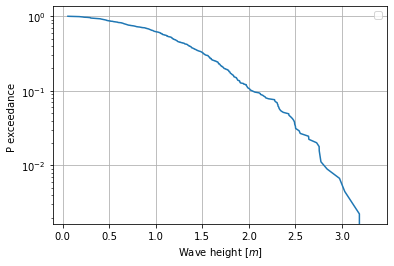

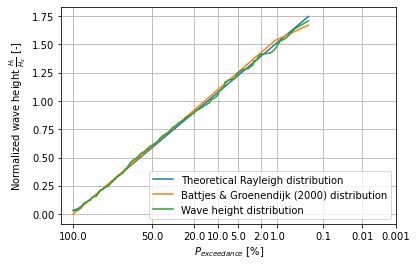

In [87]:
timeseries.plot_hist_waveheight()
timeseries.plot_exceedance_waveheight()
timeseries.plot_exceedance_waveheight_Rayleigh(
    normalize=True, plot_BG=True, water_depth=8, cota_slope=250
)



It is also possible to compute the Battjes-Groenendijk distribution itself:

In [88]:
compute_BattjesGroenendijk_wave_height_distribution(
    2, timeseries.nwave, 3, cota_slope=250
)

(array([0.        , 1.1196    , 2.84952629]),
 array([1.        , 0.80944598, 0.00223214]))

### Fourier analysis

The time series canalso be transformed to Fourier components,



In [89]:
f, xFreq, isOdd = timeseries.get_fourier_comp()


These Fourier components can also be used to construct a spectrum with the `compute_spectrum_freq_serie` functions,

In [90]:
[ff, ss] = compute_spectrum_freq_serie(f, xFreq, 0.01, timeseries.nt)